In [5]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 

2024-02-17 07:50:34.249439: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-17 07:50:34.252809: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-17 07:50:34.293666: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 07:50:34.293725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 07:50:34.296910: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [10]:
(X_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [11]:
print("Testing data shape:", x_test.shape)

Testing data shape: (10000, 32, 32, 3)


In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:

y_test = y_test.reshape(-1,)

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [17]:
classes= ['airplane','automobile','bird','cat','deer','dog','frog','ship','horse','truck']

In [18]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

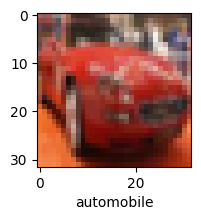

In [19]:
plot_sample(X_train,y_train,5)

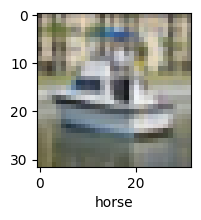

In [20]:
plot_sample(X_train,y_train,501)

In [21]:
X_train=X_train/255.0
x_test=x_test/255.0

In [22]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8179 - accuracy: 0.3520
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6255 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5402 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4811 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4347 - accuracy: 0.4931


In [25]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test,y_pred_classes))

313/313 [==============================] - 3s 9ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.55      0.54      0.55      1000
           1       0.65      0.54      0.59      1000
           2       0.48      0.20      0.28      1000
           3       0.33      0.34      0.33      1000
           4       0.45      0.38      0.41      1000
           5       0.35      0.46      0.39      1000
           6       0.48      0.63      0.55      1000
           7       0.64      0.46      0.54      1000
           8       0.58      0.67      0.62      1000
           9       0.48      0.67      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

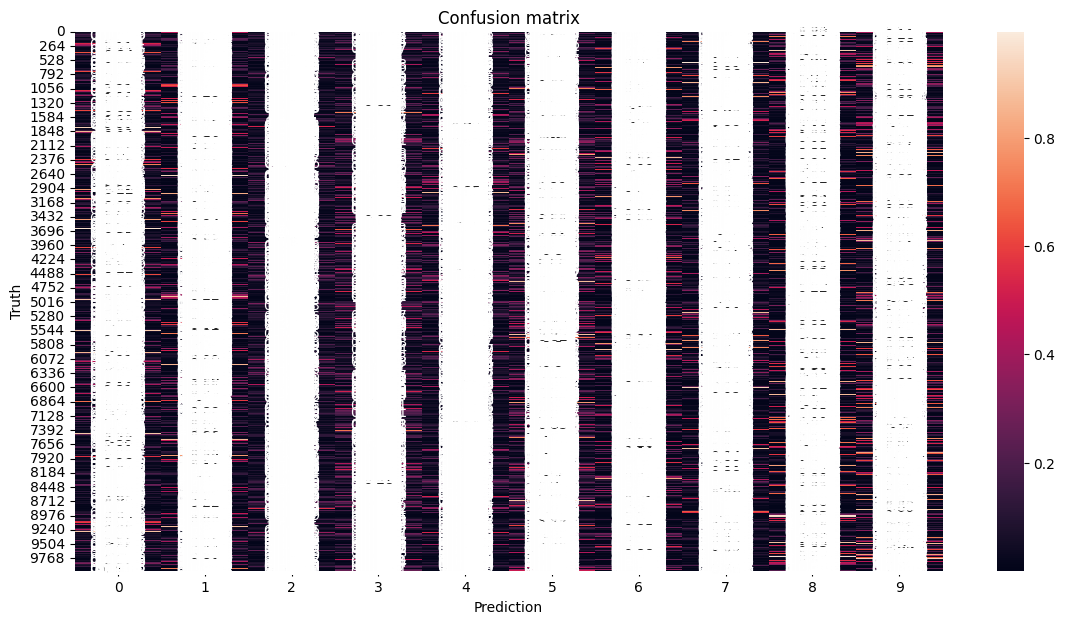

In [27]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred,annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [31]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [32]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4567 - accuracy: 0.4780
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1165 - accuracy: 0.6098
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9867 - accuracy: 0.6568
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9037 - accuracy: 0.6861
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8374 - accuracy: 0.7095
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7789 - accuracy: 0.7292
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7291 - accuracy: 0.7460
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6864 - accuracy: 0.7598
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6463 - accuracy: 0.7733
Epoch 10/10
1563/1563 [==============================] - 18s 12m

In [33]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9368 - accuracy: 0.6944


[0.936775803565979, 0.6944000124931335]

In [34]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[2.7676167e-03, 1.6908292e-03, 2.3300655e-02, 3.6766067e-01,
        6.0337270e-03, 5.2854925e-01, 9.3720201e-04, 1.4700970e-03,
        6.7045949e-02, 5.4406875e-04],
       [2.8581775e-04, 5.2889305e-01, 9.7929558e-08, 2.4189893e-08,
        7.9664505e-07, 5.0236798e-10, 2.4781041e-10, 2.2722048e-08,
        4.7077924e-01, 4.0842646e-05],
       [2.0507842e-01, 3.3999711e-02, 6.9977473e-03, 1.0977607e-02,
        8.9134317e-04, 1.7919415e-04, 1.5554931e-04, 1.6287675e-04,
        6.7653590e-01, 6.5021709e-02],
       [8.0248892e-01, 5.7357582e-03, 3.5738047e-02, 8.0541931e-03,
        2.5707170e-02, 3.4083470e-05, 5.9900992e-04, 2.3334932e-04,
        1.2052205e-01, 8.8736520e-04],
       [7.3174238e-06, 5.3955207e-04, 3.5387184e-02, 5.8452617e-02,
        5.6591481e-01, 2.7015399e-02, 3.1220406e-01, 2.6202219e-04,
        5.0752613e-05, 1.6632063e-04]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 1, 8, 0, 4]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

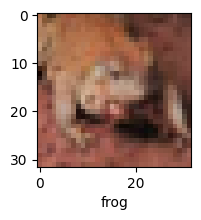

In [43]:
plot_sample(x_test, y_test,5)

In [42]:
classes[y_classes[5]]

'frog'